# Q1 Regression Methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

## Q1.1 Processing stock pirce data in Python

### Q1.1.1

In [74]:
px = pd.read_csv("./../data/priceData.csv").set_index('date').dropna()
dates = px.index
date_axis = [dt.datetime.strptime(d,'%d/%m/%Y').date() for d in dates]
logpx = np.log(px)

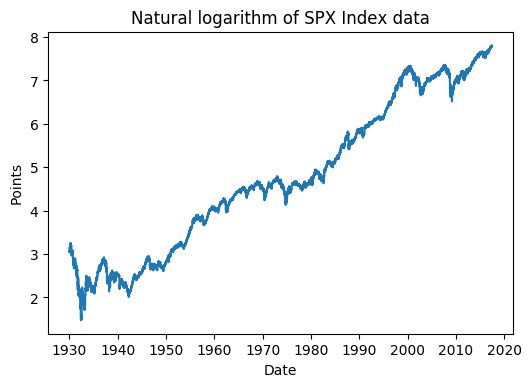

In [75]:
plt.figure(dpi=100)
plt.plot(date_axis,logpx)
plt.title('Natural logarithm of SPX Index data')
plt.xlabel('Date')
plt.ylabel('Points')
plt.show()

### Q1.1.2

In [4]:
WINDOW_SZ = 252

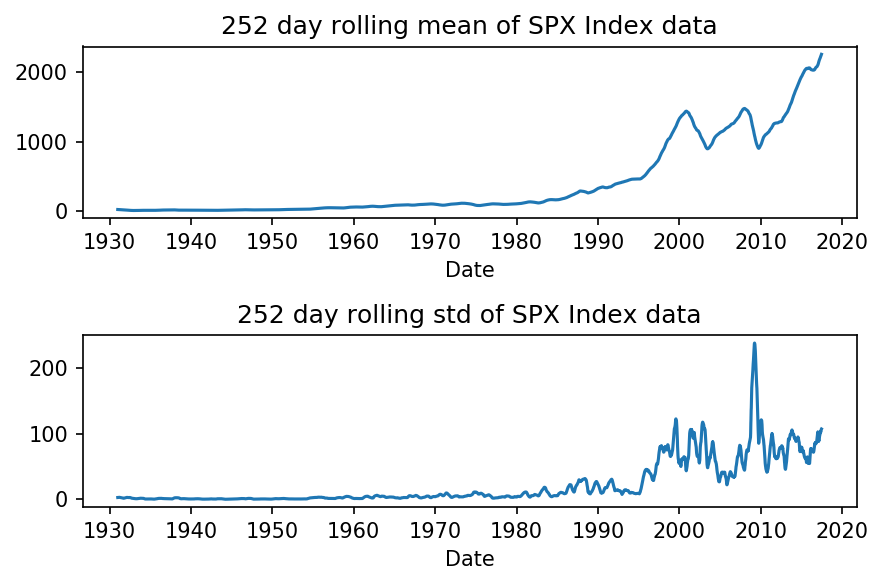

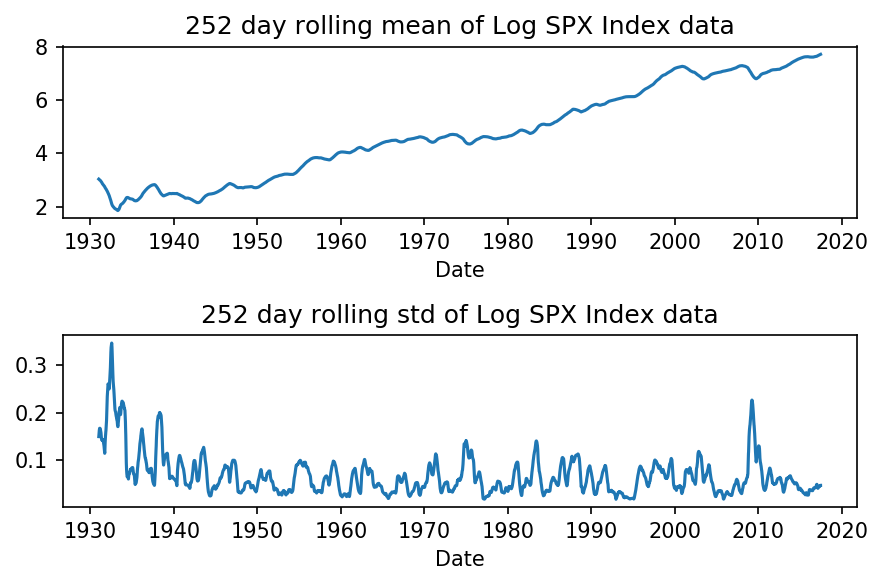

In [5]:
plt.figure(dpi=150)
plt.subplot(211)
plt.title('252 day rolling mean of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,px.rolling(WINDOW_SZ).mean())
# Sliding standard deviation
plt.subplot(212)
plt.plot(date_axis,px.rolling(WINDOW_SZ).std())
plt.title('252 day rolling std of SPX Index data')
plt.xlabel('Date')
plt.tight_layout()
plt.show()
# Log Sliding mean
plt.figure(dpi=150)
plt.subplot(211)
plt.plot(date_axis,logpx.rolling(WINDOW_SZ).mean())
plt.title('252 day rolling mean of Log SPX Index data')
plt.xlabel('Date')
# Log Sliding standard deviation
plt.subplot(212)
plt.plot(date_axis,logpx.rolling(WINDOW_SZ).std())
plt.title('252 day rolling std of Log SPX Index data')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

#### Stationarity of price time-series

The rolling mean for both price and log price shows that the mean price trends upwards.
Neither of these time-series are stationairy.

The rolling std for price also trends upwards, but the log price std does not exhibit a clear, positive trend.
The simple price rolling std is susceptible to the exponential growth of the price.
The same percentge change in 2019, would produce a larger variance value than that same percentage change in 1940.
So the rolling std of the price is not stationary.

The rolling std of the log price is obtained from the linearly increasing log price.
This makes is less susceptible to the trend of the log price time-series, and is stationary.

### Q1.1.3

In [6]:
# log return
logret = logpx.diff()

# simple return
simpret = px.pct_change()

#### Sliding statistics of log returns

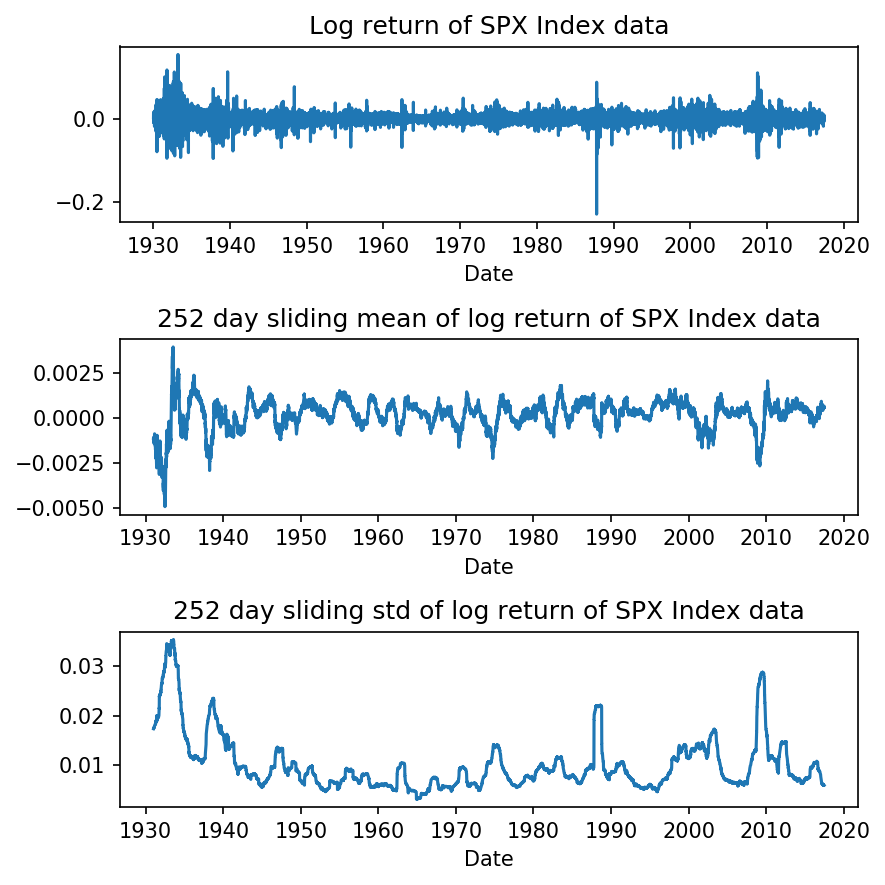

In [7]:
# Log returns
plt.figure(dpi=150, figsize=(6,6))
plt.subplot(311)
plt.plot(date_axis,logret)
plt.title('Log return of SPX Index data')
plt.xlabel('Date')
plt.tight_layout()
# Sliding mean Log return
plt.subplot(312)
logret_roll_mean = logret.rolling(WINDOW_SZ).mean()
plt.plot(date_axis,logret_roll_mean)
plt.title('252 day sliding mean of log return of SPX Index data')
plt.xlabel('Date')
5
plt.tight_layout()
# Sliding var Log return
plt.subplot(313)
logret_roll_var = logret.rolling(WINDOW_SZ).std()
plt.plot(date_axis,logret_roll_var)
plt.title('252 day sliding std of log return of SPX Index data')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

#### Sliding statistics of simple returns

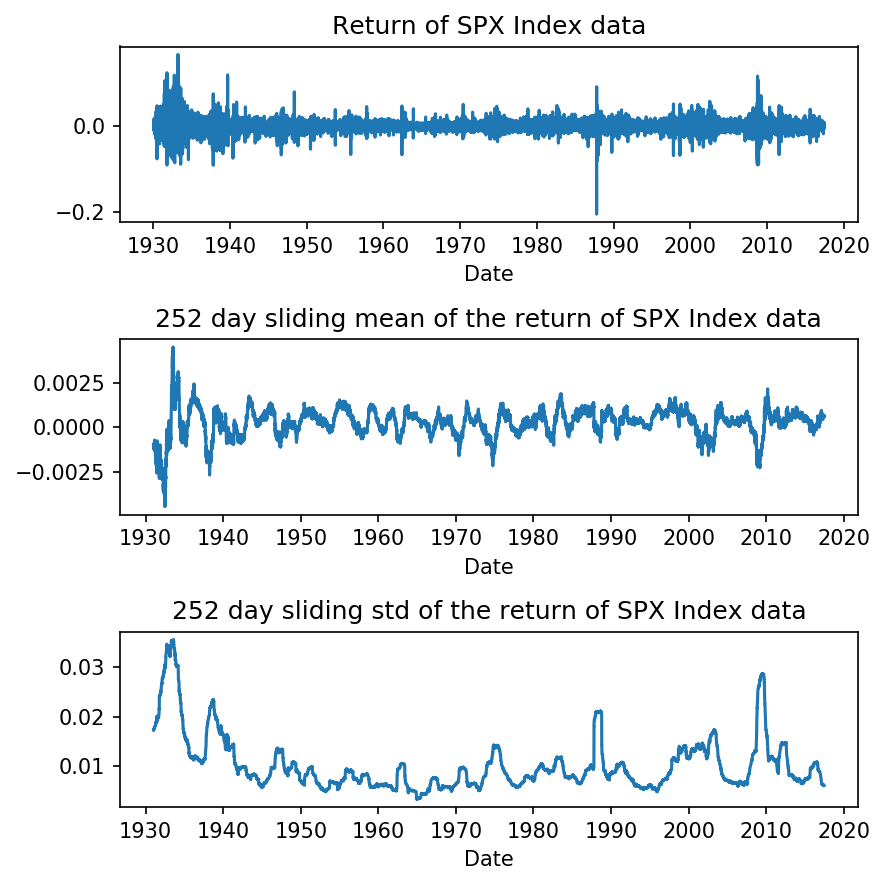

In [8]:
# Simple return
plt.figure(dpi=150, figsize=(6,6))
plt.subplot(311)
plt.title('Return of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,simpret)
plt.tight_layout()
# Sliding mean simple return
plt.subplot(312)
simpret_roll_mean = simpret.rolling(WINDOW_SZ).mean()
plt.title('252 day sliding mean of the return of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,simpret_roll_mean)
plt.tight_layout()
# Sliding variance simple return
plt.subplot(313)
simpret_roll_var = simpret.rolling(WINDOW_SZ).std()
plt.title('252 day sliding std of the return of SPX Index data')
plt.xlabel('Date')
plt.plot(date_axis,simpret_roll_var)
plt.tight_layout()

The rolling mean of both the log return and simple return are stationary, unlike the rolling means of the log price and price.

This makes the time-series more suitable for analysis as it removes trends and allows for better comparison to other time-series.

### Q1.1.4

#### Suitability of log returns over simple returns for SP purposes:

If we assume that prices are log normally distributed, then the log returns would be normally distributed.
This property is useful for when normality is assumed in statisics.

When returns are very small, the log returns are very close in value to the simple returns. Small returns are common for trades holding the asset for a short duration, e.g. one day / daily returns.

Log returns can be decomposed into the difference between two logs. So the compound return over n time periods can be done in O(1) time.
The sum of normal values is normal, but the product is not. So the compound return obtained via log returns is also normally distributed.

In [24]:
# Jarque-Bera test for Gaussianity
from scipy import stats

print("JB p-value for log price: {}".format(stats.jarque_bera(logpx)[1]))
print("JB p-value for log returns: {}".format(stats.jarque_bera(logret[1:])[1]))
print("JB p-value for simple returns: {}".format(stats.jarque_bera(simpret[1:])[1]))

JB p-value for log price: 0.0
JB p-value for log returns: 0.0
JB p-value for simple returns: 0.0


The Jarque-Bera test returned 0 for the log returns, thus rejected the null hypothesis.
This implies that the original price data was not log normally distributed. However, over shorter period of time, the prices should be log normally distributed.
So the theoretical advantages of using simple returns would not apply to this SPX time-series.

### Q1.1.5

In [25]:
data = {'prices': [1, 2, 1]}
price_df = pd.DataFrame(data, columns=['prices'])
simple_ret = price_df.pct_change()
log_ret = np.log(price_df).diff()
# correct for missing first return
simple_ret.prices[0] = 0
log_ret.prices[0] = 0

print("The simple returns: {}".format(list(simple_ret.prices)))
print("The simple returns give a total return of: {}".format(sum(simple_ret.prices)))

print("The log returns: {}".format(list(log_ret.prices)))
print("The log returns give a total return of: {}".format(sum(log_ret.prices)))

The simple returns: [0.0, 1.0, -0.5]
The simple returns give a total return of: 0.5
The log returns: [0.0, 0.6931471805599453, -0.6931471805599453]
The log returns give a total return of: 0.0


This example shows that log returns are symmetric.

### Q1.1.6

Log returns should not be used over long periods of times, as the assumption of log-normallity is unrealistic.

Log returns are not linearly additive across assets, and so should not be used when dealing with multi-asset portfolios.

## Q1.2 ARMA vs ARIMA Models for Financial Applications

### Q1.2.1

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
import copy
import datetime as dt

In [83]:
snp = pd.read_csv("./../data/snp_500_2015_2019.csv").set_index(['Date'])
snp_close = snp['Close'].to_frame().apply(np.log)
#snp_close.head()

dates = snp.index
date_axis = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]

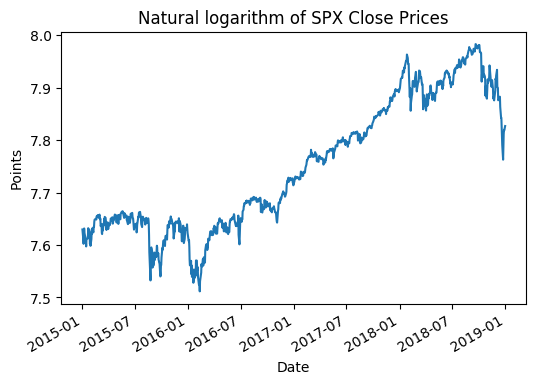

In [84]:
fig, ax = plt.subplots(dpi=100)
ax.plot(date_axis, snp_close)
# rotate and align the tick labels so they look better
fig.autofmt_xdate()

plt.title('Natural logarithm of SPX Close Prices')
plt.xlabel('Date')
plt.ylabel('Points')
plt.show()

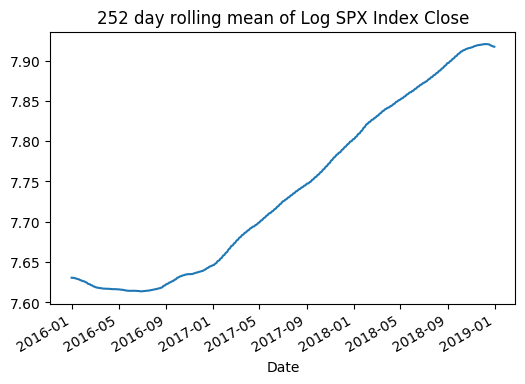

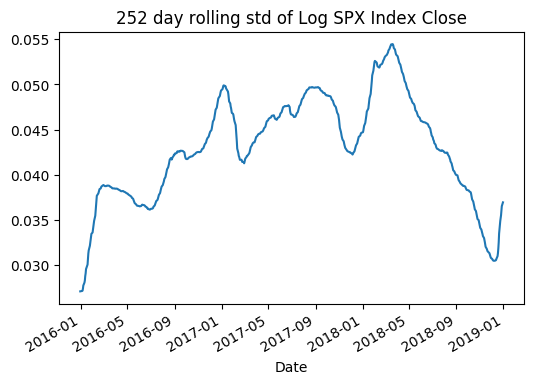

In [85]:
WINDOW_SZ = 252
# Log Sliding mean
fig, ax = plt.subplots(dpi=100)
ax.plot(date_axis, snp_close.rolling(WINDOW_SZ).mean())
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('252 day rolling mean of Log SPX Index Close')
plt.xlabel('Date')
plt.show()

# Log Sliding standard deviation
fig, ax = plt.subplots(dpi=100)
ax.plot(date_axis, snp_close.rolling(WINDOW_SZ).std())
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('252 day rolling std of Log SPX Index Close')
plt.xlabel('Date')
plt.show()

The rolling mean shows that the time-series is not stationary, so ARMA not suitable. and so ARIMA is more appropriate.

### Q1.2.2

In [92]:
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
snp_arma['Res'] = ARIMA(snp_arma, order=(1,0,1)).fit().resid
snp_arma['Prediction'] = snp_arma['True'] - snp_arma['Res']

/home/mehedi/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


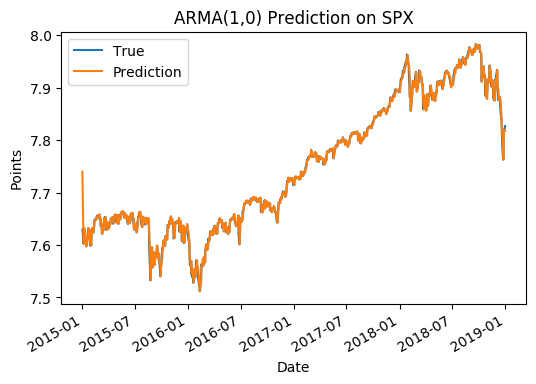

In [93]:
fig, ax = plt.subplots(dpi=100)
ax.plot(date_axis, snp_arma['True'], label="True")
ax.plot(date_axis, snp_arma['Prediction'], label="Prediction")
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('ARMA(1,0) Prediction on SPX')
plt.xlabel('Date')
plt.ylabel("Points")
plt.legend()
plt.show()

In [94]:
arma_1_0_sse = np.sum((snp_arma['True']-snp_arma['Prediction'])**2)
print("SSE of ARMA(1,0) Predictions: {}".format(arma_1_0_sse))

SSE of ARMA(1,0) Predictions: 0.08675908609244501


The ARMA(1,0) model performs well at predicting this time-series. It acts as a Random Walk, which is not stationary and the previous values have a long lasting impact on the prediction. This allows ARMA(1,0) to fit the trended, non-stationary time-series.

In practice, this is not that useful unless the stock is only held for a day. Since the model heavily relies on the trend, predictions for prices further than one day away will have this trend bias along with compounding errors.

### Q1.2.3

In [89]:
snp_arima = copy.deepcopy(snp_close)
snp_arima.columns = ['True']
snp_arima['Res'] = ARIMA(snp_arima, order=(1,1,0)).fit().resid
snp_arima['Prediction'] = snp_arima['True'] - snp_arima['Res']

/home/mehedi/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mehedi/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


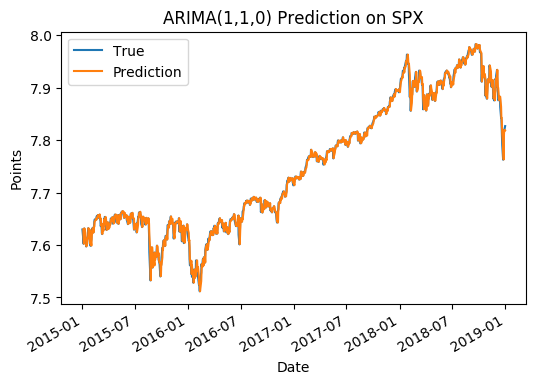

In [90]:
fig, ax = plt.subplots(dpi=100)
ax.plot(date_axis, snp_arima['True'], label="True")
ax.plot(date_axis, snp_arima['Prediction'], label="Prediction")
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('ARIMA(1,1,0) Prediction on SPX')
plt.xlabel('Date')
plt.ylabel("Points")
plt.legend()
plt.show()

In [91]:
arima_1_1_0_sse = np.sum((snp_arima['True']-snp_arima['Prediction'])**2)
print("SSE of ARIMA(1,1,0) Predictions: {}".format(arima_1_1_0_sse))

SSE of ARIMA(1,1,0) Predictions: 0.0746545241081268


The ARIMA(1,1,0) model produced predictions with a lower SSE.

ARIMA 'detrends' the data, and the reliance on trends is minimal compared to ARMA(1,0).
This makes the ARIMA more suitable for predicting returns further than a day out.

### Q1.2.4

The log prices have the symmetric property.
This is important for the initial differencing step in ARIMA to correctly remove the trends.

## Q1.3

### Q1.3.1

VAR can be represented as $ \mathbf{Y} = \mathbf{BZ}+\mathbf{U} $ where:

$$
\mathbf{Y} = [\mathbf{y}[p]\space\space[\mathbf{y}[p+1]\space...\space[\mathbf{y}[T]]
$$

$$
\mathbf{B} = [\mathbf{c}\space\mathbf{A}_1\space\mathbf{A}_2\space...\space\mathbf{A}_p] 
$$

$$
\mathbf{Z} =
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
\mathbf{y}[p-1] & \mathbf{y}[p] & \cdots & \mathbf{y}[T-1] \\
\mathbf{y}[p-2] & \mathbf{y}[p-1] & \cdots & \mathbf{y}[T-2] \\
\vdots & \vdots & \ddots & \vdots \\
\mathbf{y}[0] & \mathbf{y}[1] & \cdots & \mathbf{y}[T-p] \\
\end{bmatrix}
$$

$$
\mathbf{U} = [\mathbf{e}[p]\space\space[\mathbf{e}[p+1]\space...\space[\mathbf{e}[T]]
$$

### Q1.3.2

### Derive B_opt

### Q1.3.3

### show all eigen of A < 1

### Q1.3.4

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import VAR

In [64]:
df = pd.read_csv(r'./../data/snp_allstocks_2015_2019.csv')
df = df.set_index('Date')
info = pd.read_csv(r'./../data/snp_info.csv')
info.drop(columns=info.columns[0],inplace=True)

In [68]:
tickers = ['CAG', 'MAR', 'LIN', 'HCP', 'MAT']
stocks = df[tickers]
stocks_ma = stocks.rolling(window=66).mean()
stocks_detrended = stocks.sub(stocks_ma).dropna()

In [70]:
model = VAR(stocks_detrended)
results = model.fit(1)
A = results.params[1:].values
eigA, _ = np.linalg.eig(A)

/home/mehedi/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [71]:
eigA

array([0.71449288+0.12927613j, 0.71449288-0.12927613j,
       1.00635964+0.j        , 0.86051894+0.j        ,
       0.91144512+0.j        ])

Elaborate on whether it would make sense to construct a portfolio using these stocks? Why? Comment
on your results.

### Q1.3.5

In [98]:
def eig_regression(stocks):
    stocks_ma = stocks.rolling(window=66).mean()
    stocks_detrended = stocks.sub(stocks_ma).dropna()
    model = VAR(stocks_detrended)
    results = model.fit(1)
    A = results.params[1:].values
    eigA, _ = np.linalg.eig(A)
    return eigA

In [99]:
sector_stocks = {}
print("Sectors:")
for sector in info['GICS Sector'].unique():
    print(sector)
    tickers = info.loc[info['GICS Sector']== sector]['Symbol'].tolist()
    stocks = df[tickers]
    sector_stocks[sector] = stocks

Sectors:
Industrials
Health Care
Information Technology
Communication Services
Consumer Discretionary
Utilities
Financials
Materials
Real Estate
Consumer Staples
Energy


In [101]:
sector_eig = {}
for sector, stocks in sector_stocks.items():
    sector_eig[sector] = eig_regression(stocks)

/home/mehedi/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mehedi/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mehedi/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mehedi/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency i

In [102]:
sector_eig

{'Industrials': array([0.30898365+0.20579796j, 0.30898365-0.20579796j,
        0.38774011+0.15973564j, 0.38774011-0.15973564j,
        0.37441871+0.08362775j, 0.37441871-0.08362775j,
        0.40240072+0.j        , 0.57266598+0.27585727j,
        0.57266598-0.27585727j, 0.50628132+0.19819543j,
        0.50628132-0.19819543j, 0.45996978+0.05100044j,
        0.45996978-0.05100044j, 0.47008373+0.j        ,
        0.5506172 +0.15327462j, 0.5506172 -0.15327462j,
        0.61494857+0.20470522j, 0.61494857-0.20470522j,
        0.5595859 +0.j        , 0.68183875+0.21126093j,
        0.68183875-0.21126093j, 0.7695556 +0.2232116j ,
        0.7695556 -0.2232116j , 0.69423291+0.17615432j,
        0.69423291-0.17615432j, 0.65335394+0.11028367j,
        0.65335394-0.11028367j, 0.62945386+0.j        ,
        0.68009607+0.04286244j, 0.68009607-0.04286244j,
        0.84001094+0.17702412j, 0.84001094-0.17702412j,
        0.81128295+0.14700475j, 0.81128295-0.14700475j,
        0.76491978+0.06720231j, 0

Explain whether it would be more advisable, in general, to build a portfolio by grouping the stocks by
sector? Comment on your results.